# Проект игра

## Описание  
На основе данных открытых источников 2016 года о продажах игр, оценок пользователей и экспертов, жанров и платформ провести исследование для интернет-магазина игр. 

## Цель  
Выявить определяющие успешность игры закономерности с целью выявить потенциально популярный продукт.

## Вывод

При выборе игры следует ориентироваться на регион пользователей: Япония или Северная Америка и Европа.  
При этом есть общие закономерности для всего мира - это популярность платформы PS4, жанра Action, рейтинга E - игры для всех (от 6 лет) и положительное влияние оценки критиков на продажи.  
Для Европы и Северной Америки характерны игры жанра Shooter, Action, Sports с рейтингом M "игры для взрослых"(от 17 лет) на платформе PS4.
Для Японии - Role-Playing игры с рейтингом T "для подростков" (от 13 лет) на платформе 3DS. 

## Шаг 1. Изучим данные.

Импортируем библиотеки

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

Загрузим и посмотрим данные

In [2]:
dt = pd.read_csv('games.csv')
dt.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Приведем столбцы к нижнему регистру

In [3]:
dt.columns = dt.columns.str.lower()
dt.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Посмотрим на типы данных

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Поле year_of_release переведем в тип int - целое число

In [5]:
dt['year_of_release'] = dt['year_of_release'].astype('Int64')
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Посмотрим на уникальные значения critic_score

In [6]:
dt['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Так как везде целые числа, изменим тип на целые числа

In [7]:
dt['critic_score'] = dt['critic_score'].astype('Int64') 
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


Посмотрим пропущенные значения

In [8]:
dt.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Посмотрим процент пропущенных значений

In [9]:
dt.isna().sum()*100/len(dt)

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

Два названия игры отсутсвуют, работать с ними мы не сможем, удалим эти данные.  
269 записей не имеют года выпуска игры, это может помешать исследованию, тоже удалим эти данные.  
В остальных полях пропущено 40-50% данных - их удалить мы уже не можем без потери ценности.

In [10]:
dt = dt.dropna(subset = ['genre', 'year_of_release'])
dt.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

## Шаг 2. Предобработка данных

Посмотрим дубликаты в данных

In [11]:
dt.duplicated().sum()

0

Дубликатов нет.  

Посмотрим неявные дубликаты в столбцах.

In [12]:
for i in dt:
    display('Название столбца:',i)
    display(dt[i].unique())
    display()

'Название столбца:'

'name'

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

'Название столбца:'

'platform'

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

'Название столбца:'

'year_of_release'

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 37, dtype: Int64

'Название столбца:'

'genre'

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

'Название столбца:'

'na_sales'

array([4.136e+01, 2.908e+01, 1.568e+01, 1.561e+01, 1.127e+01, 2.320e+01,
       1.128e+01, 1.396e+01, 1.444e+01, 2.693e+01, 9.050e+00, 9.710e+00,
       9.000e+00, 8.920e+00, 1.500e+01, 9.010e+00, 7.020e+00, 9.430e+00,
       1.278e+01, 4.740e+00, 6.380e+00, 1.083e+01, 9.540e+00, 9.660e+00,
       8.410e+00, 6.060e+00, 3.430e+00, 5.510e+00, 6.850e+00, 9.040e+00,
       5.890e+00, 6.030e+00, 9.700e+00, 5.280e+00, 4.990e+00, 8.250e+00,
       8.520e+00, 5.540e+00, 6.990e+00, 6.620e+00, 5.030e+00, 5.990e+00,
       3.960e+00, 2.500e+00, 7.970e+00, 6.910e+00, 4.340e+00, 4.350e+00,
       3.010e+00, 6.160e+00, 6.760e+00, 4.020e+00, 4.890e+00, 2.960e+00,
       4.760e+00, 5.010e+00, 6.730e+00, 5.950e+00, 3.660e+00, 5.550e+00,
       7.040e+00, 6.650e+00, 3.880e+00, 5.800e+00, 4.100e+00, 5.930e+00,
       4.360e+00, 5.700e+00, 2.030e+00, 4.400e+00, 5.050e+00, 3.540e+00,
       1.120e+00, 6.820e+00, 1.750e+00, 3.740e+00, 1.060e+00, 2.790e+00,
       2.910e+00, 9.900e-01, 2.570e+00, 2.990e+00, 

'Название столбца:'

'eu_sales'

array([2.896e+01, 3.580e+00, 1.276e+01, 1.093e+01, 8.890e+00, 2.260e+00,
       9.140e+00, 9.180e+00, 6.940e+00, 6.300e-01, 1.095e+01, 7.470e+00,
       6.180e+00, 8.030e+00, 4.890e+00, 8.490e+00, 9.090e+00, 4.000e-01,
       3.750e+00, 9.200e+00, 4.460e+00, 2.710e+00, 3.440e+00, 5.140e+00,
       5.490e+00, 3.900e+00, 5.350e+00, 3.170e+00, 5.090e+00, 4.240e+00,
       5.040e+00, 5.860e+00, 3.680e+00, 4.190e+00, 5.730e+00, 3.590e+00,
       4.510e+00, 2.550e+00, 4.020e+00, 4.370e+00, 6.310e+00, 3.450e+00,
       2.810e+00, 2.850e+00, 3.490e+00, 1.000e-02, 3.350e+00, 2.040e+00,
       3.070e+00, 3.870e+00, 3.000e+00, 4.820e+00, 3.640e+00, 2.150e+00,
       3.690e+00, 2.650e+00, 2.560e+00, 3.110e+00, 3.140e+00, 1.940e+00,
       1.950e+00, 2.470e+00, 2.280e+00, 3.420e+00, 3.630e+00, 2.360e+00,
       1.710e+00, 1.850e+00, 2.790e+00, 1.240e+00, 6.120e+00, 1.530e+00,
       3.470e+00, 2.240e+00, 5.010e+00, 2.010e+00, 1.720e+00, 2.070e+00,
       6.420e+00, 3.860e+00, 4.500e-01, 3.480e+00, 

'Название столбца:'

'jp_sales'

array([3.770e+00, 6.810e+00, 3.790e+00, 3.280e+00, 1.022e+01, 4.220e+00,
       6.500e+00, 2.930e+00, 4.700e+00, 2.800e-01, 1.930e+00, 4.130e+00,
       7.200e+00, 3.600e+00, 2.400e-01, 2.530e+00, 9.800e-01, 4.100e-01,
       3.540e+00, 4.160e+00, 6.040e+00, 4.180e+00, 3.840e+00, 6.000e-02,
       4.700e-01, 5.380e+00, 5.320e+00, 5.650e+00, 1.870e+00, 1.300e-01,
       3.120e+00, 3.600e-01, 1.100e-01, 4.350e+00, 6.500e-01, 7.000e-02,
       8.000e-02, 4.900e-01, 3.000e-01, 2.660e+00, 2.690e+00, 4.800e-01,
       3.800e-01, 5.330e+00, 1.910e+00, 3.960e+00, 3.100e+00, 1.100e+00,
       1.200e+00, 1.400e-01, 2.540e+00, 2.140e+00, 8.100e-01, 2.120e+00,
       4.400e-01, 3.150e+00, 1.250e+00, 4.000e-02, 0.000e+00, 2.470e+00,
       2.230e+00, 1.690e+00, 1.000e-02, 3.000e+00, 2.000e-02, 4.390e+00,
       1.980e+00, 1.000e-01, 3.810e+00, 5.000e-02, 2.490e+00, 1.580e+00,
       3.140e+00, 2.730e+00, 6.600e-01, 2.200e-01, 3.630e+00, 1.450e+00,
       1.310e+00, 2.430e+00, 7.000e-01, 3.500e-01, 

'Название столбца:'

'other_sales'

array([8.450e+00, 7.700e-01, 3.290e+00, 2.950e+00, 1.000e+00, 5.800e-01,
       2.880e+00, 2.840e+00, 2.240e+00, 4.700e-01, 2.740e+00, 1.900e+00,
       7.100e-01, 2.150e+00, 1.690e+00, 1.770e+00, 3.960e+00, 1.057e+01,
       5.500e-01, 2.040e+00, 1.360e+00, 4.200e-01, 4.600e-01, 1.410e+00,
       1.780e+00, 5.000e-01, 1.180e+00, 8.000e-01, 1.160e+00, 1.320e+00,
       5.900e-01, 2.380e+00, 1.130e+00, 7.800e-01, 2.420e+00, 1.120e+00,
       1.280e+00, 1.570e+00, 1.300e+00, 1.010e+00, 9.100e-01, 1.790e+00,
       1.970e+00, 8.600e-01, 1.210e+00, 2.300e-01, 7.600e-01, 7.400e-01,
       7.530e+00, 2.900e-01, 1.030e+00, 5.200e-01, 2.110e+00, 1.600e+00,
       1.610e+00, 3.500e-01, 9.700e-01, 1.060e+00, 6.300e-01, 1.500e-01,
       7.900e-01, 9.600e-01, 1.250e+00, 9.000e-01, 8.100e-01, 3.900e-01,
       6.800e-01, 8.500e-01, 1.800e-01, 8.000e-02, 6.700e-01, 7.000e-01,
       4.100e-01, 3.300e-01, 6.000e-01, 5.400e-01, 1.730e+00, 1.230e+00,
       1.600e-01, 1.110e+00, 3.100e-01, 4.800e-01, 

'Название столбца:'

'critic_score'

<IntegerArray>
[  76, <NA>,   82,   80,   89,   58,   87,   91,   61,   97,   95,   77,   88,
   83,   94,   93,   85,   86,   98,   96,   90,   84,   73,   74,   78,   92,
   71,   72,   68,   62,   49,   67,   81,   66,   56,   79,   70,   59,   64,
   75,   60,   63,   69,   50,   25,   42,   44,   55,   48,   57,   29,   47,
   65,   54,   20,   53,   37,   38,   33,   52,   30,   32,   43,   45,   51,
   40,   46,   39,   34,   41,   36,   31,   27,   35,   26,   19,   28,   23,
   24,   21,   17,   13]
Length: 82, dtype: Int64

'Название столбца:'

'user_score'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'Название столбца:'

'rating'

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В данных о рейтинге user_score имеется аббревиатура tbd, что означает To Be Determined, то есть "Будет определено". Заменим на Nan , так как данные на сегодня нам неизвестны, а нам нужно проводить анализ по оценкам. Переведем в тип float для дальнейшей работы с данными.

In [13]:
# меняем на Nan, так как впоследствии не сможем строить графики с данными типа str
dt['user_score'] = dt['user_score'].replace('tbd', np.NaN)
dt['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [14]:
# Меняем тип данных
dt['user_score'] = dt['user_score'].astype('float')
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


Посчитаем суммарные продажи во всех регионах и запишем данные в столбец total_sales

In [15]:
dt['total_sales'] = dt['na_sales'] + dt['eu_sales'] + dt['jp_sales'] + dt['other_sales']
dt.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


## Шаг 3. Исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы.

In [16]:
dt.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

С 2006 по 2011 пик продаж. А с 2012 почти в 2 раза продажи упали.

Для анализа нам подойдут только актуальные данные последнего периода за 2016 и 2015 года.

### Посмотрим, как менялись продажи по платформам.

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

Найдем топ 5 платформ с наибольшими продажами.

In [17]:
top5_platform = dt.groupby('platform')['total_sales'].count().sort_values(ascending=False).head()
top5_platform

platform
PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
Name: total_sales, dtype: int64

Выделим их из датафрейма dt.

In [18]:
dt_top5_platform = dt[dt['platform'].isin(top5_platform.index)]
dt_top5_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91


Напишем функцию для составления графиков.

In [19]:
def plot_hist (df, platform):
    df = df.loc[df['platform'] == platform]
    sb.barplot(x=df['year_of_release'], y=df['total_sales'])
    plt.title('Гистограмма продаж платформы {} по годам'.format(platform))
    plt.show();

Берем только индексы массива top5_platform для цикла.

In [20]:
top5_platform.index

Index(['PS2', 'DS', 'PS3', 'Wii', 'X360'], dtype='object', name='platform')

In [21]:
dt_top5_platform.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       3823
user_score         3986
rating             2419
total_sales           0
dtype: int64

Напишем цикл для гистограмм топ 5 платформ.

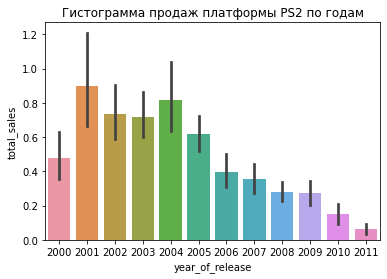

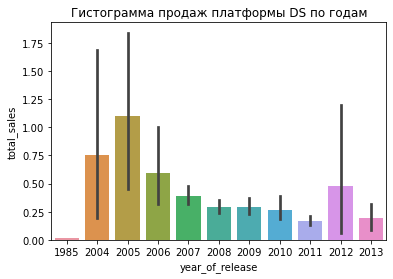

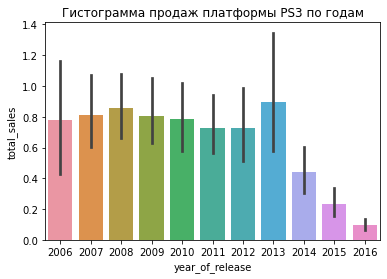

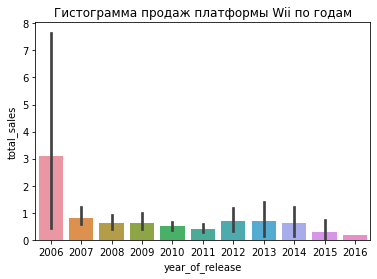

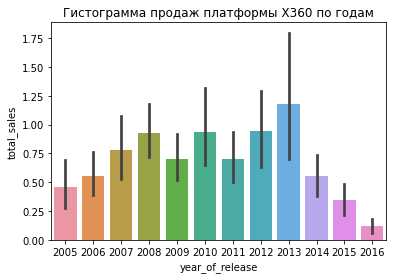

In [22]:
for i in top5_platform.index:
    plot_hist (dt_top5_platform, i)

Из графиков видно, что средний срок жизни платформ около 10 лет.

Проверим расчетом

In [23]:
for i in top5_platform.index:
    life_span_platform = 0
    life_span_platform = dt_top5_platform.loc[dt_top5_platform['platform'] == i]['year_of_release'].max() - dt_top5_platform.loc[dt_top5_platform['platform'] == i]['year_of_release'].min()
    print(life_span_platform)

11
28
10
10
11


**ВЫВОД**  
По расчету видно, что действительно срок существования платформ 10-11 лет. Отклоняется от нормы платформа DS - 28 лет: она основана в 1985, а фактическая деятельность началась с 2004 года по 2013 год, то есть тоже 10 лет.

Возьмем данные за актуальный период 2016 год и 2015 год, как последние актуальные годы. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [24]:
# выделим данные за 2016 год и 2015 год, как последние актуальные годы
dt_2016 = dt[(dt['year_of_release']==2015) | (dt['year_of_release']==2016)]
dt_2016.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,<NA>,NaN,NaN,7.39


### Посмотрим, какие платформы лидируют по продажам за 2015 и 2016 годы

In [25]:
# top 5 платформ 2016 года
dt_2016_top5 = dt_2016.groupby('platform')['total_sales'].count().sort_values(ascending=False).head()
dt_2016_top5

platform
PS4     301
PSV     195
XOne    167
3DS     132
PS3     111
Name: total_sales, dtype: int64

Построим диаграммы продаж по первой пятерке платформ за все года.  
Напишем цикл для гистограмм топ 5 платформ, применив функцию plot_hist.

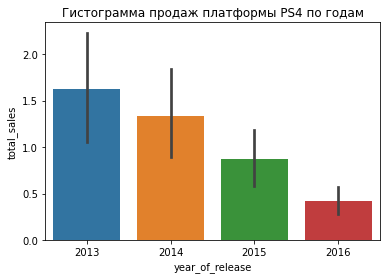

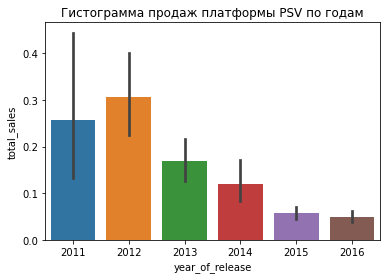

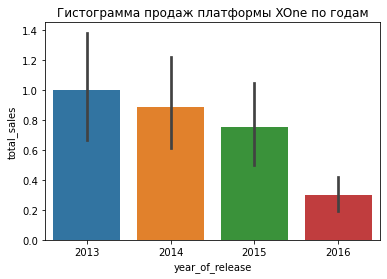

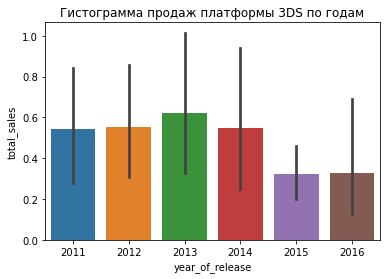

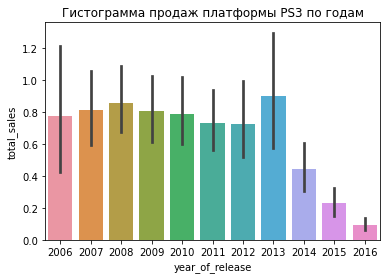

In [26]:
for i in dt_2016_top5.index:
    plot_hist (dt, i)

**ВЫВОД**  
Наиболее прибыльные платформы из пятерки  это платформы PS4, XOne, PS3  с максимальными значениями свыше 0.9. Однако платформа PS3 уже на 10 году жизни, поэтому расчитывать на нее в 2017 году не стоит.   
Поэтому оптимальная тройка будет выглядеть как PS4, XOne, 3DS.

Построим график «ящик с усами» по глобальным продажам игр за 2015 и 2016 годы в разбивке по платформам.

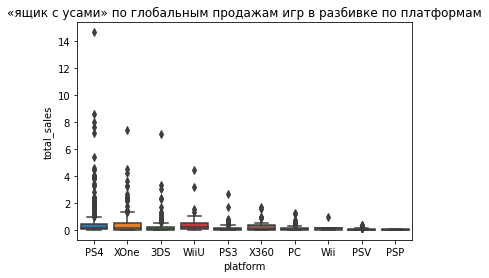

In [27]:
sb.boxplot(data = dt_2016, y = 'total_sales', x='platform')
plt.title('«ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.show();

В первой тройке слева имеются значительные выбросы данных по продажам.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.  

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Найдем платформы с наибольшими оценками

In [28]:
dt_2016.groupby('platform')['critic_score', 'user_score'].max()\
    .sort_values(by=['critic_score', 'user_score'], ascending=False)

C:\Users\mdvor\AppData\Local\Temp\ipykernel_11180\4250929981.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt_2016.groupby('platform')['critic_score', 'user_score'].max()\


,critic_score,user_score
platform,,
PC,96,9.3
XOne,95,9.2
PSV,93,9.3
PS4,93,9.2
3DS,90,9.0
WiiU,88,8.9
PS3,63,8.3
X360,<NA>,8.4
PSP,<NA>,NaN


самые популярные PС, XOne, PSV, PS4, 3DS.

Выделим пятерку

In [29]:
# top 5 платформ 
top5 = dt_2016.groupby('platform')['critic_score', 'user_score'].max()\
    .sort_values(by=['critic_score', 'user_score'], ascending=False).head(5).index
top5

C:\Users\mdvor\AppData\Local\Temp\ipykernel_11180\1522738697.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top5 = dt_2016.groupby('platform')['critic_score', 'user_score'].max()\


Index(['PC', 'XOne', 'PSV', 'PS4', '3DS'], dtype='object', name='platform')

#### Посмотрим зависимости продаж от оценок на платформах.

In [30]:
# функция для построения диаграммы рассеивания
def scatter_diagram (df, platform):
    df[df['platform'] == "PC"]\
    .plot(x='critic_score', y='total_sales', kind='scatter', title='Зависимость {} продаж от оценки критиков'.format(platform));
    df[df['platform'] == "PC"]\
    .plot(x='user_score', y='total_sales', kind='scatter', title='Зависимость {} продаж от оценки пользователей'.format(platform)); 

Посмотрим диаграммы рассеяния по топ 5 платформ и расссчитаем зависимость продаж от оценок критиков и оценок пользователей методом вывода коэффициента Пирсона

Коэффициент корреляции оценки критиков и продаж на: PC


,critic_score,total_sales
critic_score,1.000000,0.377332
total_sales,0.377332,1.000000


Коэффициент корреляции оценки пользователей и продаж на: PC


,user_score,total_sales
user_score,1.000000,0.150381
total_sales,0.150381,1.000000


Коэффициент корреляции оценки критиков и продаж на: XOne


,critic_score,total_sales
critic_score,1.000000,0.430889
total_sales,0.430889,1.000000


Коэффициент корреляции оценки пользователей и продаж на: XOne


,user_score,total_sales
user_score,1.000000,-0.041467
total_sales,-0.041467,1.000000


Коэффициент корреляции оценки критиков и продаж на: PSV


,critic_score,total_sales
critic_score,1.000000,0.003604
total_sales,0.003604,1.000000


Коэффициент корреляции оценки пользователей и продаж на: PSV


,user_score,total_sales
user_score,1.000000,0.078335
total_sales,0.078335,1.000000


Коэффициент корреляции оценки критиков и продаж на: PS4


,critic_score,total_sales
critic_score,1.000000,0.392849
total_sales,0.392849,1.000000


Коэффициент корреляции оценки пользователей и продаж на: PS4


,user_score,total_sales
user_score,1.000000,-0.059738
total_sales,-0.059738,1.000000


Коэффициент корреляции оценки критиков и продаж на: 3DS


,critic_score,total_sales
critic_score,1.000000,0.177575
total_sales,0.177575,1.000000


Коэффициент корреляции оценки пользователей и продаж на: 3DS


,user_score,total_sales
user_score,1.000000,0.198796
total_sales,0.198796,1.000000


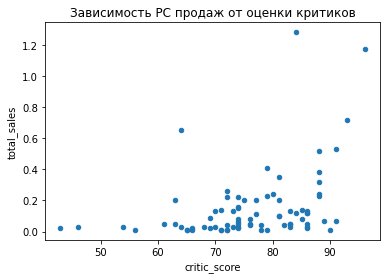

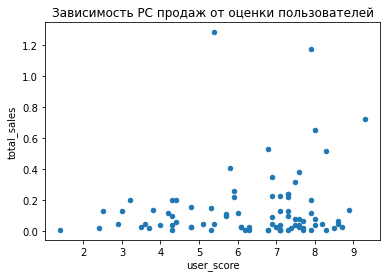

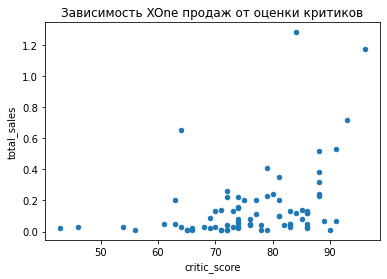

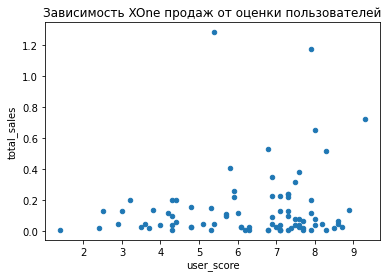

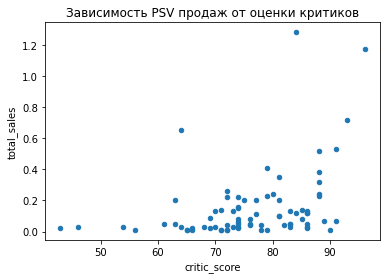

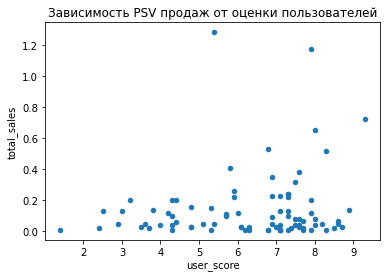

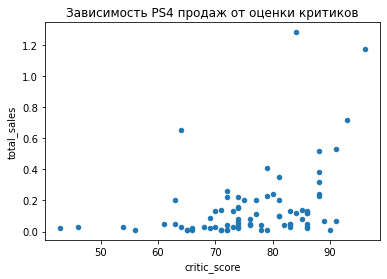

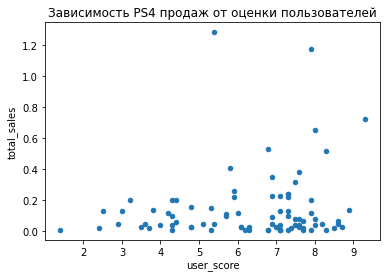

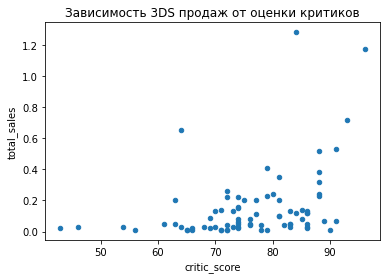

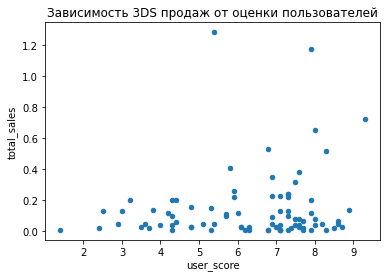

In [31]:
for i in top5:
    # Посчитаем корреляцию critic_score расчетом коэффициента Пирсона
    print('Коэффициент корреляции оценки критиков и продаж на:', i)
    display(dt_2016[dt_2016['platform'] == i][['critic_score', 'total_sales']].corr())
    
    # Посчитаем корреляцию user_score
    print('Коэффициент корреляции оценки пользователей и продаж на:', i)
    display(dt_2016[dt_2016['platform'] == i][['user_score', 'total_sales']].corr())
    
     # диаграмма
    scatter_diagram(dt_2016, i)

**ВЫВОД**  
Зависимость продаж и оценок по платформам отличается.  
По PC, PSV, 3DS зависимость от оценок пользователей и критиков положительная, причем по PC от критиков зависимость больше, а по PSV и 3DS зависимость больше от оценок пользователей.  
По PS4 и XOne зависимость от оценков критиков положительная, а от оценок пользователей скорее отрицательная или близка к 0.

#### Посмотрим на распределение игр по жанрам. 

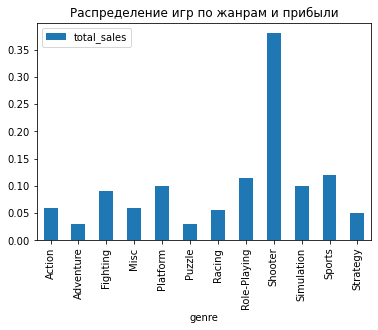

In [32]:
dt_2016.pivot_table(index='genre', values='total_sales', aggfunc='median')\
    .plot(kind='bar', title='Распределение игр по жанрам и прибыли');

Самый прибыльный жанр - Shooter. Наименее прибыльные - Adventure, Puzzle.

## Составим портрет пользователя каждого региона

#### Посмотрим самые популярные платформы в регионах

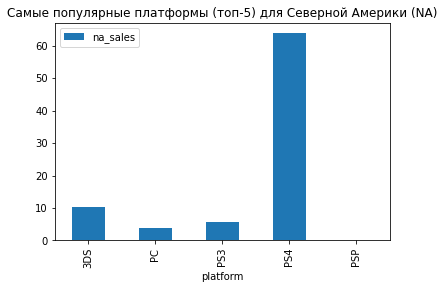

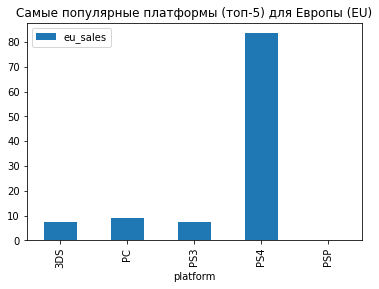

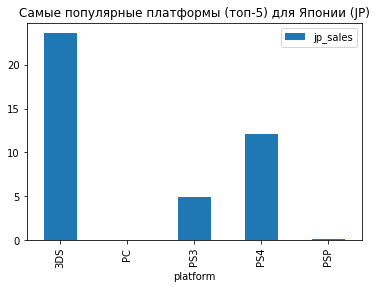

In [33]:
dt_2016.pivot_table(index='platform', values='na_sales', aggfunc='sum').head()\
    .plot(kind='bar', title='Самые популярные платформы (топ-5) для Северной Америки (NA)');
dt_2016.pivot_table(index='platform', values='eu_sales', aggfunc='sum').head()\
    .plot(kind='bar', title='Самые популярные платформы (топ-5) для Европы (EU)');
dt_2016.pivot_table(index='platform', values='jp_sales', aggfunc='sum').head()\
    .plot(kind='bar', title='Самые популярные платформы (топ-5) для Японии (JP)');
plt.show();

**ВЫВОД**  
Самая популярная платформа в мире PS4. В то время как в Японии наиболее популярна 3DS, на втором месте PS4.

#### Посмотрим продажи по рейтингу ESRB в Америке, Европе и Японии

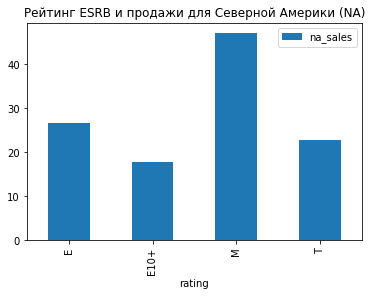

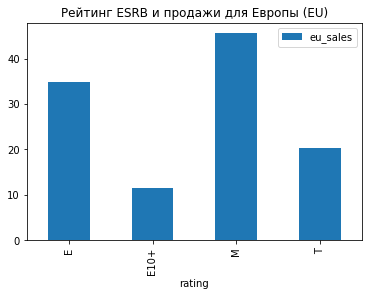

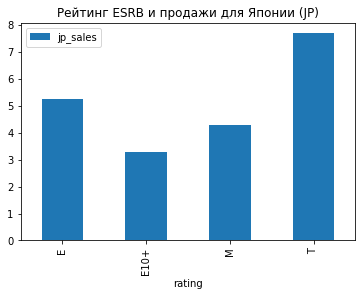

In [34]:
dt_2016.pivot_table(index='rating', values='na_sales', aggfunc='sum')\
    .plot(kind='bar', title='Рейтинг ESRB и продажи для Северной Америки (NA)');
dt_2016.pivot_table(index='rating', values='eu_sales', aggfunc='sum')\
    .plot(kind='bar', title='Рейтинг ESRB и продажи для Европы (EU)');
dt_2016.pivot_table(index='rating', values='jp_sales', aggfunc='sum')\
    .plot(kind='bar', title='Рейтинг ESRB и продажи для Японии (JP)');
plt.show();

**ВЫВОД**  
В Северной Америке наиболее популярны игры для взрослых и для всех пользователей, как и в Европе. А в Японии более популярны игры для подростков и для всех пользователей.

#### Посмотрим какие жанры лучше продаются в регионах

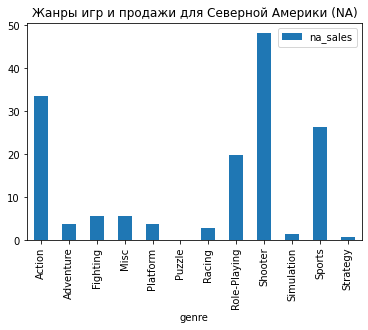

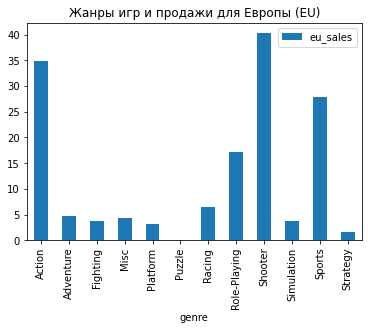

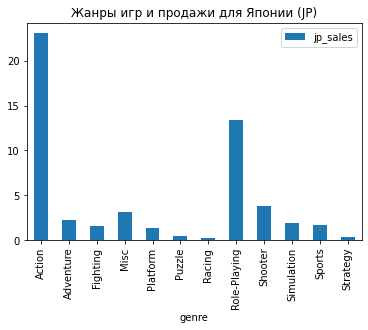

In [35]:
# посмотрим на жанры в регионах
dt_2016.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
    .plot(kind='bar', title='Жанры игр и продажи для Северной Америки (NA)');
dt_2016.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
    .plot(kind='bar', title='Жанры игр и продажи для Европы (EU)');
dt_2016.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
    .plot(kind='bar', title='Жанры игр и продажи для Японии (JP)');
plt.show();

**ВЫВОД**  
Европа и Америка играет в Shoter, Action, Sports, а Япония  в основном в Action и в Role-Playing. Жанр Puzzle в Европе и в Америке совсем потерял свою актуальность, а в Японии еще продается, даже больше, чем Racing или Strategy, входящие в тройку самых непопулярных игр в Японии.

# Проверьте гипотезы

Проверим две гипотезы:  

1.	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2.	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

#### Первая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза: средний пользовательский рейтинг платформы Xbox равен среднему пользовательскому рейтингу платформы PC. 

Альтернативная гипотеза: Они же не равны. Гипотезу не принимаем.

Поскольку нам доступны не выборки а целые генеральные совокупности, проверку гипотезы проведем с помощью метода scipy.stats.ttest_ind() для проверок гипотезы о равенстве средних двух генеральных совокупностей. Пороговое значение alpha возмем общепринятое в 5%.

In [36]:
# выделим интересующие нас выборки пользовательского рейтинга по платформам
pl_XOne = dt_2016.query('platform == "XOne" and user_score > 0 ')['user_score']
pl_PC = dt_2016.query('platform == "PC" and user_score > 0 ')['user_score']
# пороговое значение
alpha = .05
# найдем значение pvalue
res = st.ttest_ind (pl_XOne, pl_PC)
print('p-значение:', res.pvalue)
# сравним полученное значение с пороговым
if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.2778542084733835
Не получилось отвергнуть нулевую гипотезу


**Вывод:**  
    Наша первая гипотеза верная - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

#### Вторая гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.

Альтернативная гипотеза: Рейтинги не равны. Гипотезу принимаем.

Поскольку нам доступны не выборки а целые генеральные совокупности, проверку гипотезы проведем с помощью метода scipy.stats.ttest_ind() для проверок гипотезы о равенстве средних двух генеральных совокупностей. Пороговое значение alpha возмем общепринятое в 5%.

In [37]:
# выделим интересующие нас выборки пользовательского рейтинга по жанрам
g_action = dt_2016.query('genre == "Action" and user_score > 0 ')['user_score']
g_sports = dt_2016.query('genre == "Sports" and user_score > 0 ')['user_score']
# пороговое значение
alpha = .05
# найдем значение pvalue
res = st.ttest_ind (g_action, g_sports)
print('p-значение:', res.pvalue)
# сравним полученное значение с пороговым
if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0012846807938657e-13
Отвергаем нулевую гипотезу


**Вывод:**   
Рейтинги не равны. Гипотеза о неравенстве средних пользовательских рейтингов жанров Action и Sports верна.

# Общий вывод

Выявлены следующие закономерности, которые необходимо учитывать:
    
1. Срок жизни платформы 10-11 лет. PS4, XOne, 3DS в середине своего жизненного пути.
2. Существует разница в платформах, жанрах и оценках по регионам: Северная Америка и Европа против Японии.
3. Платформа PS4 популярна во всем мире, в особенности в Северной Америке и в Европе. В Японии PS4 занимает второе место после 3DS.  
4. Согласно рейтингу ESRB "игры для всех" популярны во всем мире. В Европе и Америке более популярны "игры для взрослых", в Японии - "для подростков".  
5. Оценки критиков оказывают положительно влияние на продажи игр.  
6. Action игры популярны во всем мире. В Европе и Америке наиболее популярны: Shooter, Action, Sports - в порядке популярности. В Японии Action тоже популярен после Role-Playing игр. Приэтом в Японии востребованы все виды жанров, в том числе Puzzle, забытый в Европе и Америке. Рекомендуется исходить от ресурсов на выпуск игры.
7. Средние пользовательские рейтинги XOne и PC одинаковые
8. Средние пользовательские рейтинги жанров Action и Sports разные.